## Step 0: Installation and setup

In [1]:
# importing the libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Getting the data ready

# Content:
The dataset contains emials and subjects collected for a spam research, it contains 5574 emails and wether they are spam or not

In [2]:
# Importing our dataset
emails_ds = pd.read_csv("/content/drive/MyDrive/email/emails.csv")
print(emails_ds.describe())

              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [3]:
emails_ds.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
emails_ds.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
emails_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Step 2: Data Preprocessing

In [6]:
emails_ds.shape

(5728, 2)

In [7]:
# Checking for missing values
emails_ds.isna().sum()

text    0
spam    0
dtype: int64

In [8]:
# Class value counts
emails_ds['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [9]:
# Splitnig data into spam and nonspma categories
non_spam, spam = emails_ds[emails_ds['spam']==0], emails_ds[emails_ds['spam']==1]
non_spam.shape, spam.shape

((4360, 2), (1368, 2))

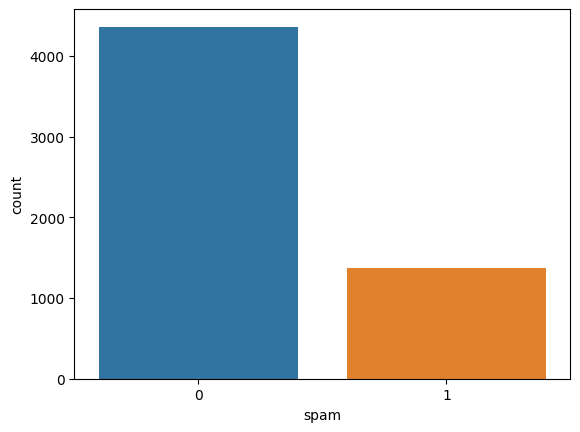

In [10]:
sns.countplot(x=emails_ds['spam'], label = 'Count spam vs non-spam');

Count Vectorizer Example

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [12]:
X = vectorizer.fit_transform(sample_data)

In [13]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [14]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

Apply on the dataset

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

emails_countvectorizer = vectorizer.fit_transform(emails_ds['text'])

In [16]:
emails_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [18]:
emails_countvectorizer.shape

(5728, 37303)

In [19]:
label = emails_ds['spam'].values

### Test The Data

In [20]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = emails_ds['spam'].values
NB_classifier.fit(emails_countvectorizer, label)

MultinomialNB()

In [21]:
# Challenge
testing_sample = ['Free money!!!', "hi please send us an email to have a free gift"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

x = NB_classifier.predict(testing_sample_countvectorizer)
x

array([1, 1])

In [22]:
testing_sample_countvectorizer.shape

(2, 37303)

### Dividing the data into training and test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(emails_countvectorizer, label, test_size=0.2)

# Step 3: Training the Model

In [25]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Step 4: Evaluating The Model

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_preds = NB_classifier.predict(emails_countvectorizer)
NB_classifier.score(X_test,y_test)

0.9869109947643979

<Axes: >

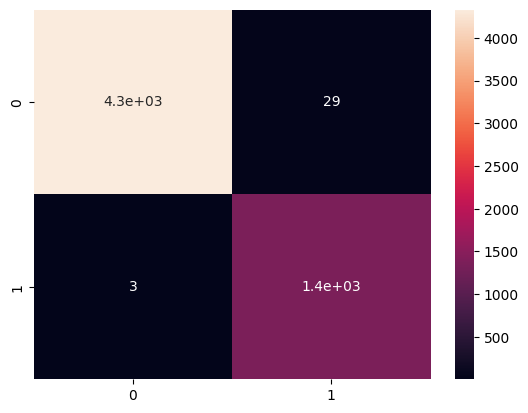

In [33]:
cm = confusion_matrix(label, y_preds)
sns.heatmap(cm, annot=True)

<Axes: >

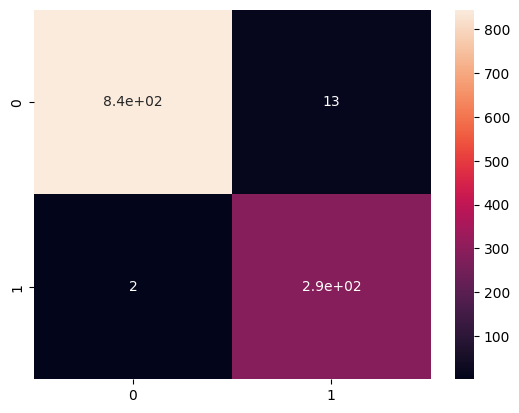

In [34]:
y_preds = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       857
           1       0.96      0.99      0.97       289

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

